In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [158]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [159]:
# Finding the csv from the league
# Multi League directory
country = 'US'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'mls.csv'
csv_file = dirCountry + file_title

In [160]:
# Testing against current season
current_season = 2020

In [161]:
# Retrieving previous saved data
df_laliga = pd.read_csv(csv_file) 
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [162]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [163]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,1.0,2.0,41%,1.0,0.0,1.0,337.0,254.0,75%,0.0
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,2.0,4.0,61%,3.0,0.0,3.0,593.0,537.0,91%,1.0
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,5.0,1.0,64%,3.0,0.0,3.0,475.0,382.0,80%,-2.0
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,7.0,0.0,56%,1.0,0.0,2.0,443.0,321.0,72%,0.0


In [164]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,2.0,41%,1.0,0.0,1.0,337.0,254.0,75%,0.0,0.0
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,4.0,61%,3.0,0.0,3.0,593.0,537.0,91%,1.0,-1.0
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,1.0,64%,3.0,0.0,3.0,475.0,382.0,80%,-2.0,2.0
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,0.0,56%,1.0,0.0,2.0,443.0,321.0,72%,0.0,0.0


In [165]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    if r["goals_home"] > r["goals_away"]:
        return 1
    elif r["goals_home"] == r["goals_away"]:
        return 0
    else:
        return -1

In [166]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,75%,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,91%,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,80%,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,72%,0.0,0.0,0,1,1,0,1,1


In [167]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Normalize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,75%,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,91%,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,80%,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,72%,0.0,0.0,0,1,1,0,1,1


In [168]:
# Group: conference west vs east
description = np.unique(df_laliga["team_home.group"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.group"] = enc.transform(df_laliga["team_home.group"].astype(str))
df_laliga["team_away.group"] = enc.transform(df_laliga["team_away.group"].astype(str))
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,75%,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,91%,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,80%,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,72%,0.0,0.0,0,1,1,0,1,1


In [169]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [170]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [171]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,75%,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,91%,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,80%,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,72%,0.0,0.0,0,1,1,0,1,1


In [172]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,75%,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,91%,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,80%,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,72%,0.0,0.0,0,1,1,0,1,1


In [173]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,1.0,253,2020,1600,Houston Dynamo,12,1,-4,LD,...,254.0,0.75,0.0,0.0,0,1,1,0,1,1
1,0.0,0.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,0.0,0.00,0.0,0.0,0,1,1,1,1,0
2,2.0,1.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,537.0,0.91,1.0,-1.0,0,1,1,1,0,1
3,0.0,2.0,253,2020,1607,Chicago Fire,7,1,-1,DL,...,382.0,0.80,-2.0,2.0,0,1,1,0,1,1
4,1.0,1.0,253,2020,1609,New England Revolution,8,1,-1,DL,...,321.0,0.72,0.0,0.0,0,1,1,0,1,1


In [174]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)

(483, 111)


In [111]:
"""
    Here the unseen data will be built as test set
"""
#p37 = [[531, 537], [529, 727], [543, 542], [538, 539], [545, 720], [546, 530], [798, 715], 
       #[541, 533], [548, 536], [532, 540], [542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       #[536, 532], [533, 545], [720, 543]]
p38 = [[542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       [536, 532], [533, 545], [720, 543]]

In [112]:
"""
    Here the unseen data will be built as test set
"""
p37 = [[33, 49],[71, 44], [35, 41], [47, 46], [51, 34], [62, 45], [39, 52], [38, 50], [66, 42], [33, 48],
       [40, 49], [42, 38], [44, 51], [49, 39], [52, 47], [45, 35], [46, 33], [50, 71], [34, 40], [41, 62], 
       [48, 66]]

In [175]:
"""
    Here the unseen data will be built as test set - MLS is back
"""
p37 = [[1601, 1609], [1608, 1613], [1614, 1615], [1606, 1611], [2242, 1602], [1610, 1612], [1605, 1600],
       [1616, 1617], [1607, 1603], [1599, 1598]]

In [176]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
17,0.0,0.0,253,2020,1601,Toronto FC,4,4,1,WD,...,218.0,0.75,0.0,0.0,1,0,1,0,1,1
184,3.0,2.0,253,2019,1601,Toronto FC,4,4,1,WD,...,266.0,0.76,1.0,-1.0,1,0,1,0,1,1
5,0.0,1.0,253,2020,1608,Atlanta United FC,1,6,2,WW,...,103.0,0.90,-1.0,1.0,2,0,0,1,0,1
113,1.0,3.0,253,2019,1608,Atlanta United FC,1,6,2,WW,...,208.0,0.73,-2.0,2.0,2,0,0,1,0,1
31,0.0,0.0,253,2020,1614,Montreal Impact,2,4,1,DW,...,0.0,0.00,0.0,0.0,1,0,1,1,1,0


In [177]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1]) & (df_laliga["season"]==current_season)])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1]) & (df_premise["season"]==current_season)])
ts_premise.head()

,goals_home,goals_away,league,season,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
17,0.0,0.0,253,2020,1601,Toronto FC,4,4,1,WD,...,218.0,0.75,0.0,0.0,1,0,1,0,1,1
5,0.0,1.0,253,2020,1608,Atlanta United FC,1,6,2,WW,...,103.0,0.90,-1.0,1.0,2,0,0,1,0,1
31,0.0,0.0,253,2020,1614,Montreal Impact,2,4,1,DW,...,0.0,0.00,0.0,0.0,1,0,1,1,1,0
11,0.0,0.0,253,2020,1606,Real Salt Lake,9,2,0,DD,...,0.0,0.00,0.0,0.0,0,0,2,2,0,0
14,0.0,0.0,253,2020,2242,FC Cincinnati,11,0,-2,LL,...,0.0,0.00,0.0,0.0,0,2,0,1,0,1


In [178]:
print(ts_laliga.shape)
print(ts_premise.shape)

(10, 128)
(10, 111)


In [179]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(483, 124)


In [180]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [181]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(464, 124)
(464, 107)


In [182]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[0, 1, -1, 0, -1, 1, -1, 0, 0, 1, -1, 1, 0, 0, -1, 1, 0, -1, 1, 0, 1, -1, 1, -1, 0, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 0, 0, 1, 0, 1, 1, 0, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 0, 0, 1, -1, 1, 0, 0, 0, 1, 0, -1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, -1, 1, -1, 1, 0, 1, 1, -1, 0, -1, -1, 1, -1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, 0, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 0, -1, -1, -1, -1, 1, -1, -1, 0, -1, -1, 0, 1, -1, 1, -1, -1, 1, 1, 0, -1, 0, 1, 1, -1, 1, 0, 1, 0, 1, 1, 1, -1, 1, 0, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 0, 1, 1, 1, -1, 0, 0, -1, -1, 1, 0, 1, 1, -1, 1, 1, 1, 1, -1, 1, 0, 0, 1, -1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, -1, 1, 1, 1, 1, 1, 0, 0, 1, -1, -1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, -1, -1, 0, 0, 1, 1, 1, -1, 0, 0, 0, 1, 1, 0, 1, -1, 1, -1, -1, 0, 1, 1, -1, 1, 1, 1, 1, -1, 1, 0, 0, 1, -1, 0, 0, 1, -1, -1, 1, 0, -1, -1, 0, 1, 1, 0, 1, -1, -1,

In [183]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(464, 120)


In [184]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
avg_home_laliga = df_laliga.groupby(['team_home.team.id'], as_index=True)[columns_home].mean()
#avg_home_laliga = df_laliga.groupby(['team_home.team.id','season'], as_index=True)[columns_home].mean()
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
1595,5.791667,6.166667,15.916667,3.958333,10.458333,5.458333,11.041667,7.833333,1.666667,0.505833,1.416667,0.125000,3.125000,480.875000,390.500000,0.800833
1596,6.315789,6.315789,17.421053,4.789474,9.736842,7.684211,11.368421,7.105263,2.526316,0.592632,1.789474,0.105263,3.105263,532.947368,455.052632,0.851053
1597,6.000000,5.789474,15.684211,3.894737,9.157895,6.526316,12.842105,5.947368,1.789474,0.545789,1.894737,0.052632,2.315789,495.842105,420.210526,0.842105
1598,4.157895,5.631579,13.105263,3.315789,7.736842,5.368421,9.947368,5.473684,1.578947,0.466316,1.578947,0.157895,3.000000,409.736842,333.210526,0.766842
1599,5.777778,5.555556,15.500000,4.166667,10.055556,5.444444,12.222222,5.166667,2.555556,0.546111,1.277778,0.055556,2.166667,512.000000,418.722222,0.815556


In [123]:
try:
    p = avg_home_laliga.index.values
    b = list(zip(*p))
    avg_home_laliga.insert(0, column="home_team_id",value = b[0])
    avg_home_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [124]:
avg_home_laliga.head()

home_team_id  stats_home.s_on_g  stats_home.s_off_g  \
team_home.team.id season                                                        
1595              2019            1595           5.850000            6.250000   
                  2020            1595           5.500000            5.750000   
1596              2019            1596           6.411765            6.352941   
                  2020            1596           5.500000            6.000000   
1597              2019            1597           6.117647            5.941176   

                          stats_home.s_in  stats_home.s_out  \
team_home.team.id season                                      
1595              2019          16.000000          3.900000   
                  2020          15.500000          4.250000   
1596              2019          17.647059          4.882353   
                  2020          15.500000          4.000000   
1597              2019          16.000000          3.941176   

                          stats_home.s_total  stats_home.s_blocked  \
team_home.team.id season                                             
1595              2019             10.550000              5.450000   
                  2020             10.000000              5.500000   
1596              2019             10.058824              7.588235   
                  2020              7.000000              8.500000   
1597              2019              9.058824              6.941176   

                          stats_home.fouls  stats_home.corners  \
team_home.team.id season                                         
1595              2019           10.900000            8.050000   
                  2020           11.750000            6.750000   
1596              2019           11.294118            7.411765   
                  2020           12.000000            4.500000   
1597              2019           13.058824            5.941176   

                          stats_home.offside  stats_home.possession  \
team_home.team.id season                                              
1595              2019              1.550000               0.510000   
                  2020              2.250000               0.485000   
1596              2019              2.588235               0.589412   
                  2020              2.000000               0.620000   
1597              2019              1.823529               0.547059   

                          stats_home.c_yellow  stats_home.c_red  \
team_home.team.id season                                          
1595              2019               1.400000          0.150000   
                  2020               1.500000          0.000000   
1596              2019               1.764706          0.117647   
                  2020               2.000000          0.000000   
1597              2019               1.941176          0.058824   

                          stats_home.saves  stats_home.p_total  \
team_home.team.id season                                         
1595              2019            3.050000          483.650000   
                  2020            3.500000          467.000000   
1596              2019            3.058824          534.000000   
                  2020            3.500000          524.000000   
1597              2019            2.411765          498.470588   

                          stats_home.p_accurate  stats_home.p_percentage  
team_home.team.id season                                                  
1595              2019               391.000000                 0.795000  
                  2020               388.000000                 0.830000  
1596              2019               456.588235                 0.851765  
                  2020               442.000000                 0.845000  
1597              2019               425.058824                 0.848235

In [185]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
avg_away_laliga = df_laliga.groupby(['team_away.team.id'], as_index=True)[columns_away].mean()
#avg_away_laliga = df_laliga.groupby(['team_away.team.id','season'], as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

,stats_away.s_on_g,stats_away.s_off_g,stats_away.s_in,stats_away.s_out,stats_away.s_total,stats_away.s_blocked,stats_away.fouls,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage
team_away.team.id,,,,,,,,,,,,,,,,
1595,3.105263,3.526316,9.526316,2.894737,6.105263,3.421053,9.578947,4.263158,1.894737,0.476842,1.789474,0.052632,3.789474,426.052632,351.894737,0.772632
1596,5.250000,5.800000,15.950000,4.900000,8.100000,7.850000,12.700000,5.750000,1.700000,0.552500,2.400000,0.150000,3.500000,425.700000,353.300000,0.741500
1597,3.888889,5.333333,12.277778,3.055556,6.388889,5.888889,12.555556,5.611111,1.166667,0.523333,2.055556,0.000000,3.111111,499.222222,417.388889,0.827222
1598,3.388889,4.500000,10.222222,2.333333,5.888889,4.333333,11.722222,5.055556,1.611111,0.480000,1.944444,0.000000,3.222222,439.611111,349.333333,0.786667
1599,4.523810,5.428571,12.809524,2.857143,7.285714,5.523810,12.190476,5.809524,2.380952,0.502381,2.333333,0.095238,3.000000,412.047619,328.190476,0.748095
1600,3.473684,4.894737,11.578947,3.210526,7.000000,4.578947,12.157895,4.526316,1.894737,0.425789,2.631579,0.157895,3.578947,376.315789,295.947368,0.776316
1601,4.136364,4.181818,10.045455,1.727273,6.227273,3.818182,10.454545,5.181818,1.727273,0.496364,1.454545,0.136364,3.090909,476.090909,398.772727,0.792273
1602,4.250000,4.400000,11.100000,2.450000,6.900000,4.200000,13.250000,5.100000,1.750000,0.428500,1.950000,0.200000,2.700000,341.900000,225.800000,0.624500
1603,4.166667,4.166667,10.833333,2.500000,6.944444,3.888889,9.333333,4.333333,1.222222,0.454444,1.388889,0.055556,4.888889,407.277778,328.611111,0.799444


In [126]:
try:
    p = avg_away_laliga.index.values
    b = list(zip(*p))
    avg_away_laliga.insert(0, column="away_team_id",value = b[0])
    avg_away_laliga.head()
except:
    print("The indexes that are trying to be registered are already created.")

In [186]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        print(ts_laliga.iloc[i,i_th])
        print(index)
        if ts_laliga.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

1601
1595
1601
1596
1601
1597
1601
1598
1601
1599
1601
1600
1601
1601
1601
1602
1601
1603
1601
1604
1601
1605
1601
1606
1601
1607
1601
1608
1601
1609
1601
1610
1601
1611
1601
1612
1601
1613
1601
1614
1601
1615
1601
1616
1601
1617
1601
2242
1601
9568
1601
9569
1608
1595
1608
1596
1608
1597
1608
1598
1608
1599
1608
1600
1608
1601
1608
1602
1608
1603
1608
1604
1608
1605
1608
1606
1608
1607
1608
1608
1608
1609
1608
1610
1608
1611
1608
1612
1608
1613
1608
1614
1608
1615
1608
1616
1608
1617
1608
2242
1608
9568
1608
9569
1614
1595
1614
1596
1614
1597
1614
1598
1614
1599
1614
1600
1614
1601
1614
1602
1614
1603
1614
1604
1614
1605
1614
1606
1614
1607
1614
1608
1614
1609
1614
1610
1614
1611
1614
1612
1614
1613
1614
1614
1614
1615
1614
1616
1614
1617
1614
2242
1614
9568
1614
9569
1606
1595
1606
1596
1606
1597
1606
1598
1606
1599
1606
1600
1606
1601
1606
1602
1606
1603
1606
1604
1606
1605
1606
1606
1606
1607
1606
1608
1606
1609
1606
1610
1606
1611
1606
1612
1606
1613
1606
1614
1606
1615
1606
1616


,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
17,253,2020,1601,4,4,1,2,0,3,1,...,3.650000,363.800000,282.000000,0.761000,1,0,1,0,1,1
5,253,2020,1608,1,6,2,1,0,3,1,...,2.666667,442.111111,366.111111,0.769444,2,0,0,1,0,1
31,253,2020,1614,2,4,1,2,0,3,1,...,4.166667,411.055556,315.666667,0.758333,1,0,1,1,1,0
11,253,2020,1606,9,2,0,0,0,3,1,...,3.411765,440.882353,362.588235,0.818235,0,0,2,2,0,0
14,253,2020,2242,11,0,-2,0,0,1,0,...,2.700000,341.900000,225.800000,0.624500,0,2,0,1,0,1
57,253,2020,1610,3,6,2,2,0,1,1,...,3.700000,360.000000,280.850000,0.692500,2,0,0,2,0,0
43,253,2020,1605,10,1,-1,0,0,2,0,...,3.578947,376.315789,295.947368,0.776316,0,1,1,0,1,1
53,253,2020,1616,5,4,1,2,0,4,2,...,4.210526,414.105263,331.789474,0.796842,1,0,1,1,1,0
1,253,2020,1607,7,1,-1,2,0,2,1,...,4.888889,407.277778,328.611111,0.799444,0,1,1,1,1,0
23,253,2020,1599,10,1,-2,0,0,2,1,...,3.222222,439.611111,349.333333,0.786667,0,1,1,0,1,1


In [187]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
17,253,2020,1601,4,4,1,2,0,3,1,...,3.650000,363.800000,282.000000,0.761000,1,0,1,0,1,1
5,253,2020,1608,1,6,2,1,0,3,1,...,2.666667,442.111111,366.111111,0.769444,2,0,0,1,0,1
31,253,2020,1614,2,4,1,2,0,3,1,...,4.166667,411.055556,315.666667,0.758333,1,0,1,1,1,0
11,253,2020,1606,9,2,0,0,0,3,1,...,3.411765,440.882353,362.588235,0.818235,0,0,2,2,0,0
14,253,2020,2242,11,0,-2,0,0,1,0,...,2.700000,341.900000,225.800000,0.624500,0,2,0,1,0,1
57,253,2020,1610,3,6,2,2,0,1,1,...,3.700000,360.000000,280.850000,0.692500,2,0,0,2,0,0
43,253,2020,1605,10,1,-1,0,0,2,0,...,3.578947,376.315789,295.947368,0.776316,0,1,1,0,1,1
53,253,2020,1616,5,4,1,2,0,4,2,...,4.210526,414.105263,331.789474,0.796842,1,0,1,1,1,0
1,253,2020,1607,7,1,-1,2,0,2,1,...,4.888889,407.277778,328.611111,0.799444,0,1,1,1,1,0
23,253,2020,1599,10,1,-2,0,0,2,1,...,3.222222,439.611111,349.333333,0.786667,0,1,1,0,1,1


In [130]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [188]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [189]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [190]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [191]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=10)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=5)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [192]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.19032827 0.14948713 0.13636554 0.10925556 0.09290146 0.0812799
 0.06838374 0.06646946 0.05821846 0.04731048]


In [193]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.2805803  0.22037264 0.20102892 0.16106361 0.13695453]


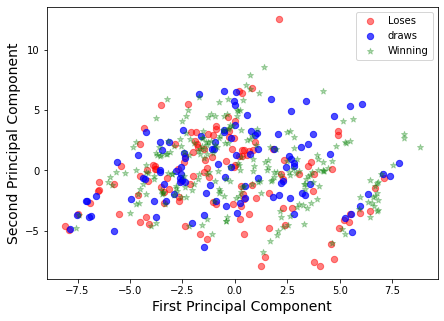

In [194]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


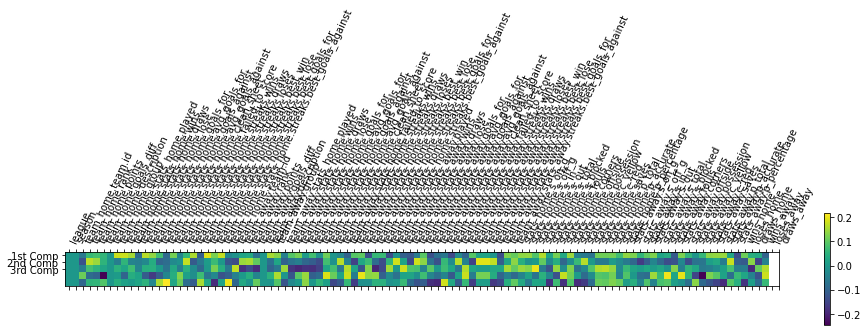

In [195]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [196]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto')
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
17,253,2020,1601,4,4,1,2,0,3,1,...,363.800000,282.000000,0.761000,1,0,1,0,1,1,1
5,253,2020,1608,1,6,2,1,0,3,1,...,442.111111,366.111111,0.769444,2,0,0,1,0,1,1
31,253,2020,1614,2,4,1,2,0,3,1,...,411.055556,315.666667,0.758333,1,0,1,1,1,0,1
11,253,2020,1606,9,2,0,0,0,3,1,...,440.882353,362.588235,0.818235,0,0,2,2,0,0,1
14,253,2020,2242,11,0,-2,0,0,1,0,...,341.900000,225.800000,0.624500,0,2,0,1,0,1,-1


In [197]:
print(results_premise["svm"])

17    1
5     1
31    1
11    1
14   -1
57    1
43    1
53    1
1     1
23    1
Name: svm, dtype: int64


In [198]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
17,253,2020,1601,4,4,1,2,0,3,1,...,363.800000,282.000000,0.761000,1,0,1,0,1,1,1
5,253,2020,1608,1,6,2,1,0,3,1,...,442.111111,366.111111,0.769444,2,0,0,1,0,1,1
31,253,2020,1614,2,4,1,2,0,3,1,...,411.055556,315.666667,0.758333,1,0,1,1,1,0,1
11,253,2020,1606,9,2,0,0,0,3,1,...,440.882353,362.588235,0.818235,0,0,2,2,0,0,1
14,253,2020,2242,11,0,-2,0,0,1,0,...,341.900000,225.800000,0.624500,0,2,0,1,0,1,-1


In [199]:
print(results_laliga["svm"])

17    1
5     1
31    1
11    1
14   -1
57    1
43    1
53    1
1     1
23    1
Name: svm, dtype: int64


In [200]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

17    1
5     1
31    1
11    1
14    1
57    1
43    1
53    1
1     1
23    1
Name: svm_pca_fi, dtype: int64
17    1
5     1
31    1
11    1
14    1
57    1
43    1
53    1
1     1
23    1
Name: svm_pca_tw, dtype: int64


In [201]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

17    1
5     1
31    1
11    1
14    1
57    1
43    1
53    1
1     1
23    1
Name: svm_pca_fi, dtype: int64
17    1
5     1
31    1
11    1
14    1
57    1
43    1
53    1
1     1
23    1
Name: svm_pca_tw, dtype: int64


In [202]:
df_premise.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,253,2020,1600,12,1,-4,0,0,1,0,...,1.0,337.0,254.0,0.75,0,1,1,0,1,1
2,253,2020,1607,7,1,-1,2,0,2,1,...,3.0,593.0,537.0,0.91,0,1,1,1,0,1
3,253,2020,1607,7,1,-1,2,0,2,1,...,3.0,475.0,382.0,0.80,0,1,1,0,1,1
4,253,2020,1609,8,1,-1,0,0,1,0,...,2.0,443.0,321.0,0.72,0,1,1,0,1,1
6,253,2020,1608,1,6,2,1,0,3,1,...,4.0,262.0,157.0,0.60,2,0,0,1,0,1


In [203]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [204]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
17,253,2020,1601,4,4,1,2,0,3,1,...,1,0,1,0,1,1,1,1,1,0
5,253,2020,1608,1,6,2,1,0,3,1,...,2,0,0,1,0,1,1,1,1,0
31,253,2020,1614,2,4,1,2,0,3,1,...,1,0,1,1,1,0,1,1,1,0
11,253,2020,1606,9,2,0,0,0,3,1,...,0,0,2,2,0,0,1,1,1,0
14,253,2020,2242,11,0,-2,0,0,1,0,...,0,2,0,1,0,1,-1,1,1,-1


In [205]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [206]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
print(gnb_p_fi.predict_proba(pca_test_premise_fi)[9])
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

[0.28127019 0.22203375 0.49669606]


,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
17,253,2020,1601,4,4,1,2,0,3,1,...,1,0,1,1,1,1,1,0,-1,-1
5,253,2020,1608,1,6,2,1,0,3,1,...,0,1,0,1,1,1,1,0,1,1
31,253,2020,1614,2,4,1,2,0,3,1,...,1,1,1,0,1,1,1,0,-1,1
11,253,2020,1606,9,2,0,0,0,3,1,...,2,2,0,0,1,1,1,0,1,1
14,253,2020,2242,11,0,-2,0,0,1,0,...,0,1,0,1,-1,1,1,-1,1,1
57,253,2020,1610,3,6,2,2,0,1,1,...,0,2,0,0,1,1,1,-1,-1,-1
43,253,2020,1605,10,1,-1,0,0,2,0,...,1,0,1,1,1,1,1,1,-1,-1
53,253,2020,1616,5,4,1,2,0,4,2,...,1,1,1,0,1,1,1,0,1,1
1,253,2020,1607,7,1,-1,2,0,2,1,...,1,1,1,0,1,1,1,0,1,1
23,253,2020,1599,10,1,-2,0,0,2,1,...,1,0,1,1,1,1,1,0,1,1


In [207]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
17,253,2020,1601,4,4,1,2,0,3,1,...,1,0,1,1,1,1,1,0,-1,0
5,253,2020,1608,1,6,2,1,0,3,1,...,0,1,0,1,1,1,1,0,1,1
31,253,2020,1614,2,4,1,2,0,3,1,...,1,1,1,0,1,1,1,0,1,1
11,253,2020,1606,9,2,0,0,0,3,1,...,2,2,0,0,1,1,1,0,1,1
14,253,2020,2242,11,0,-2,0,0,1,0,...,0,1,0,1,-1,1,1,-1,0,0


In [208]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [209]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["svm"] == result:
        count = count + 1
    if x["svm_pca_fi"] == result:
        count = count + 1
    if x["svm_pca_tw"] == result:
        count = count + 1
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    return count/6

In [210]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p
17,253,2020,1601,4,4,1,2,0,3,1,...,1,1,1,1,0,-1,0,0.500000,0.333333,0.166667
5,253,2020,1608,1,6,2,1,0,3,1,...,1,1,1,1,0,1,1,0.833333,0.166667,0.000000
31,253,2020,1614,2,4,1,2,0,3,1,...,0,1,1,1,0,1,1,0.833333,0.166667,0.000000
11,253,2020,1606,9,2,0,0,0,3,1,...,0,1,1,1,0,1,1,0.833333,0.166667,0.000000
14,253,2020,2242,11,0,-2,0,0,1,0,...,1,-1,1,1,-1,0,0,0.333333,0.333333,0.333333


In [211]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,league,season,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.group,team_home.stats_home.played,team_home.stats_home.wins,...,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p
17,253,2020,1601,4,4,1,2,0,3,1,...,1,1,1,1,0,-1,-1,0.500000,0.166667,0.333333
5,253,2020,1608,1,6,2,1,0,3,1,...,1,1,1,1,0,1,1,0.833333,0.166667,0.000000
31,253,2020,1614,2,4,1,2,0,3,1,...,0,1,1,1,0,-1,1,0.666667,0.166667,0.166667
11,253,2020,1606,9,2,0,0,0,3,1,...,0,1,1,1,0,1,1,0.833333,0.166667,0.000000
14,253,2020,2242,11,0,-2,0,0,1,0,...,1,-1,1,1,-1,1,1,0.666667,0.000000,0.333333
57,253,2020,1610,3,6,2,2,0,1,1,...,0,1,1,1,-1,-1,-1,0.500000,0.000000,0.500000
43,253,2020,1605,10,1,-1,0,0,2,0,...,1,1,1,1,1,-1,-1,0.666667,0.000000,0.333333
53,253,2020,1616,5,4,1,2,0,4,2,...,0,1,1,1,0,1,1,0.833333,0.166667,0.000000
1,253,2020,1607,7,1,-1,2,0,2,1,...,0,1,1,1,0,1,1,0.833333,0.166667,0.000000
23,253,2020,1599,10,1,-2,0,0,2,1,...,1,1,1,1,0,1,1,0.833333,0.166667,0.000000


In [212]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [213]:
# csv to save
file_title = 'mls_back.csv'
results_file = dirCountry + file_title
file_title = 'premise_back.csv'
results_premise_file = dirCountry + file_title

In [214]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [499]:
# Testing Gaussian Clustering

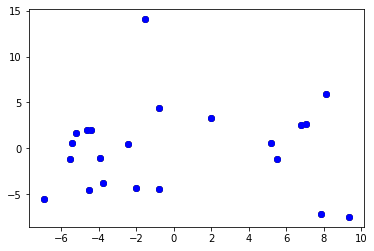

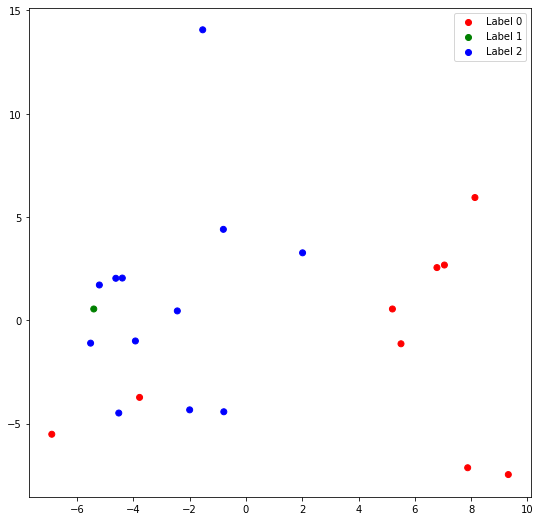

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

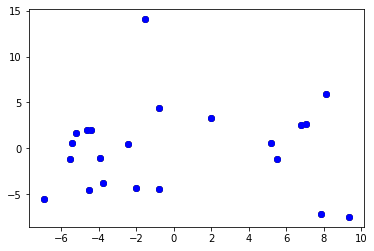

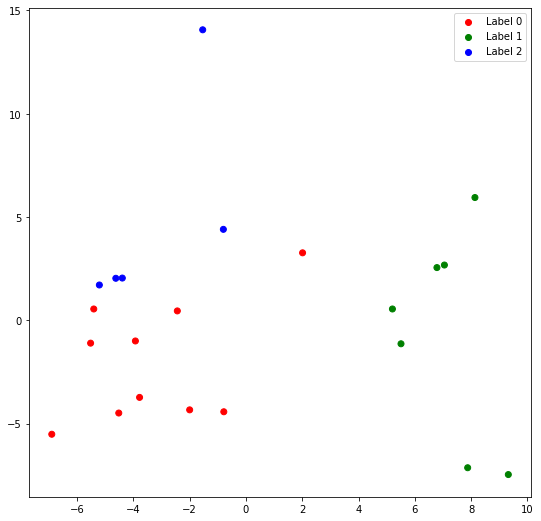

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

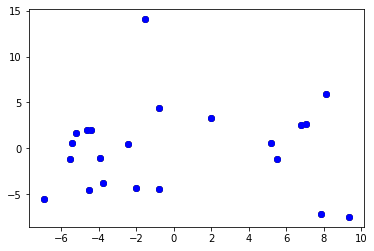

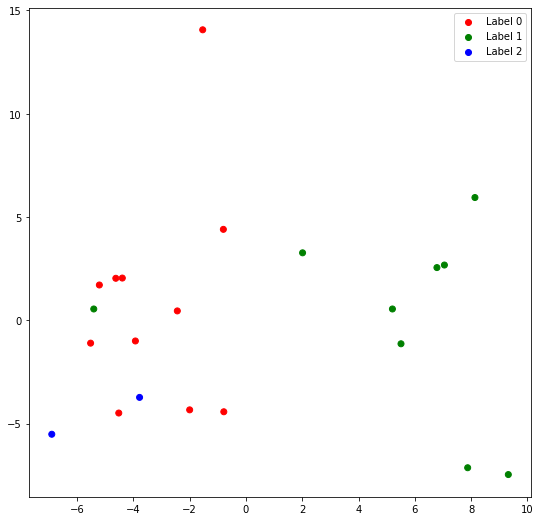

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 